## Actividad VII - Data Wrangling (Limpieza de datos).

**Consigna**
1. Se deberá realizar una limpieza de problemas (outliers, duplicados, valores nulos).

2. En caso de existir valores nulos decidir si se puede utilizar alguna técnica de imputación ya sea sensible o múltiple.

3. Se deberán resolver el problema de outliers, para esto se deberá generar una estrategia de identificación ya sea con métodos tradicionales (IQ, Z score, etc) o utilizando aprendizaje de máquina (Isolation Forest, LoF, SVM one Class, etc).

**Desarrollo**

Me interesa conocer el comportamiento de la popularidad de ventas de vehículos eléctricos, en éste caso se evalúan datos del Estado de Washington en Estados Unidos.

Seleccioné el siguiente Dataset para el proyecto desde las actividades anteriores.
Este Dataset muestra los Vehículos de Batería Eléctrica (BEVs) y Vehículos Eléctricos Híbridos (PHEVs), registrados actualmente en el Departamento de Licencias del Estado de Washington (DOL). Metadata Actualizada: March 16, 2024 URL: https://catalog.data.gov/dataset/electric-vehicle-population-data

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt 
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore") 

**Cargamos el Dataset original del proyecto, mediante la librería pandas.**

In [5]:
Dataset = pd.read_csv("https://raw.githubusercontent.com/Fab-RG/Bootcamp-DS/main/Actividad%202/Electric_Vehicle_Population_Data.csv", sep=",")
Dataset

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
0,5YJYGDEE1L,King,Seattle,WA,98122.0,2020,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,291,0,37.0,125701579,POINT (-122.30839 47.610365),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303301e+10
1,7SAYGDEE9P,Snohomish,Bothell,WA,98021.0,2023,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,1.0,244285107,POINT (-122.179458 47.802589),PUGET SOUND ENERGY INC,5.306105e+10
2,5YJSA1E4XK,King,Seattle,WA,98109.0,2019,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,270,0,36.0,156773144,POINT (-122.34848 47.632405),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303301e+10
3,5YJSA1E27G,King,Issaquah,WA,98027.0,2016,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,210,0,5.0,165103011,POINT (-122.03646 47.534065),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303303e+10
4,5YJYGDEE5M,Kitsap,Suquamish,WA,98392.0,2021,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,23.0,205138552,POINT (-122.55717 47.733415),PUGET SOUND ENERGY INC,5.303594e+10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
177861,7SAYGDEE3N,Pierce,Bonney Lake,WA,98391.0,2022,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,31.0,195224452,POINT (-122.183805 47.18062),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.305307e+10
177862,KM8K23AG1P,Mason,Shelton,WA,98584.0,2023,HYUNDAI,KONA ELECTRIC,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,35.0,228454180,POINT (-123.105305 47.211085),BONNEVILLE POWER ADMINISTRATION||CITY OF TACOM...,5.304596e+10
177863,5YJYGDEE6M,Grant,Quincy,WA,98848.0,2021,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,13.0,168797219,POINT (-119.8493873 47.2339933),PUD NO 2 OF GRANT COUNTY,5.302501e+10
177864,WVGKMPE27M,King,Black Diamond,WA,98010.0,2021,VOLKSWAGEN,ID.4,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,5.0,182448801,POINT (-122.00451 47.312185),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303303e+10


1. - 2. El Dataset que estoy trabajando en el proyecto, no tiene registros nulos y tampoco duplicados.

In [6]:
Dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 177866 entries, 0 to 177865
Data columns (total 17 columns):
 #   Column                                             Non-Null Count   Dtype  
---  ------                                             --------------   -----  
 0   VIN (1-10)                                         177866 non-null  object 
 1   County                                             177861 non-null  object 
 2   City                                               177861 non-null  object 
 3   State                                              177866 non-null  object 
 4   Postal Code                                        177861 non-null  float64
 5   Model Year                                         177866 non-null  int64  
 6   Make                                               177866 non-null  object 
 7   Model                                              177866 non-null  object 
 8   Electric Vehicle Type                              177866 non-null  object

In [7]:
Dataset.duplicated().value_counts()

False    177866
Name: count, dtype: int64

3. Aplico algoritmo UMAP, para segmentar los vehículos eléctricos con base en la autonomía de sus baterías.

Se ajusta Dataset original con las variables que tendré en cuenta para el análisis.

In [8]:
newdataset = Dataset[['Make', 'Model', 'Model Year', 'Postal Code', 'DOL Vehicle ID', 'Electric Range']].drop_duplicates('Electric Range').sort_values('Electric Range', ascending=False).reset_index().drop('index', axis=1)
newdataset['Make_Model'] = newdataset.Make.str.cat(newdataset.Model, sep=' ')
newdataset = newdataset.drop(['Make','Model'], axis=1).set_index('Make_Model')
newdataset

,Model Year,Postal Code,DOL Vehicle ID,Electric Range
Make_Model,,,,
TESLA MODEL S,2020,98512.0,109807414,337
TESLA MODEL S,2020,98006.0,8740938,330
TESLA MODEL 3,2020,98126.0,121690915,322
TESLA MODEL 3,2020,98101.0,144264130,308
TESLA MODEL X,2020,98104.0,8099885,293
...,...,...,...,...
MERCEDES-BENZ GLC-CLASS,2019,98188.0,144653862,10
MERCEDES-BENZ GLC-CLASS,2018,98133.0,180723182,9
MERCEDES-BENZ GLE-CLASS,2018,98110.0,475967012,8


Aplico método StandardScaler para transformar los datos a una matriz

In [9]:
from sklearn.preprocessing import StandardScaler

valores = newdataset.values
escalar = StandardScaler() 
valores_new = escalar.fit_transform(valores)
valores_new.shape

(102, 4)

Se implementa método UMAP para reducir las variables.

In [10]:
import umap

reducir = umap.UMAP(n_neighbors=15, n_components=2, metric='minkowski')

Se entrena algoritmo con la información reducida en paso anterior.

In [11]:
entrenar = reducir.fit_transform(valores_new)

Se convierte información entrenada sobre algoritmo, en un Dataframe y se asignan los nombres a las columnas de la tabla.

In [12]:
final = pd.DataFrame(entrenar,columns=['Comp_1','Comp_2'])
final['Make_Model'] = newdataset.index
final

,Comp_1,Comp_2,Make_Model
0,2.863650,5.008118,TESLA MODEL S
1,2.131892,5.198619,TESLA MODEL S
2,2.308560,5.118171,TESLA MODEL 3
3,2.432539,4.821885,TESLA MODEL 3
4,2.008307,5.038774,TESLA MODEL X
...,...,...,...
97,4.441499,2.223494,MERCEDES-BENZ GLC-CLASS
98,3.951337,1.905857,MERCEDES-BENZ GLC-CLASS
99,1.818569,1.114337,MERCEDES-BENZ GLE-CLASS
100,3.472178,1.029723,TOYOTA PRIUS PLUG-IN


Se grafican componentes agrupados y se indica la marca con el modelo correspondiente de cada vehículo eléctrico.

Text(0, 0.5, 'Comp_2')

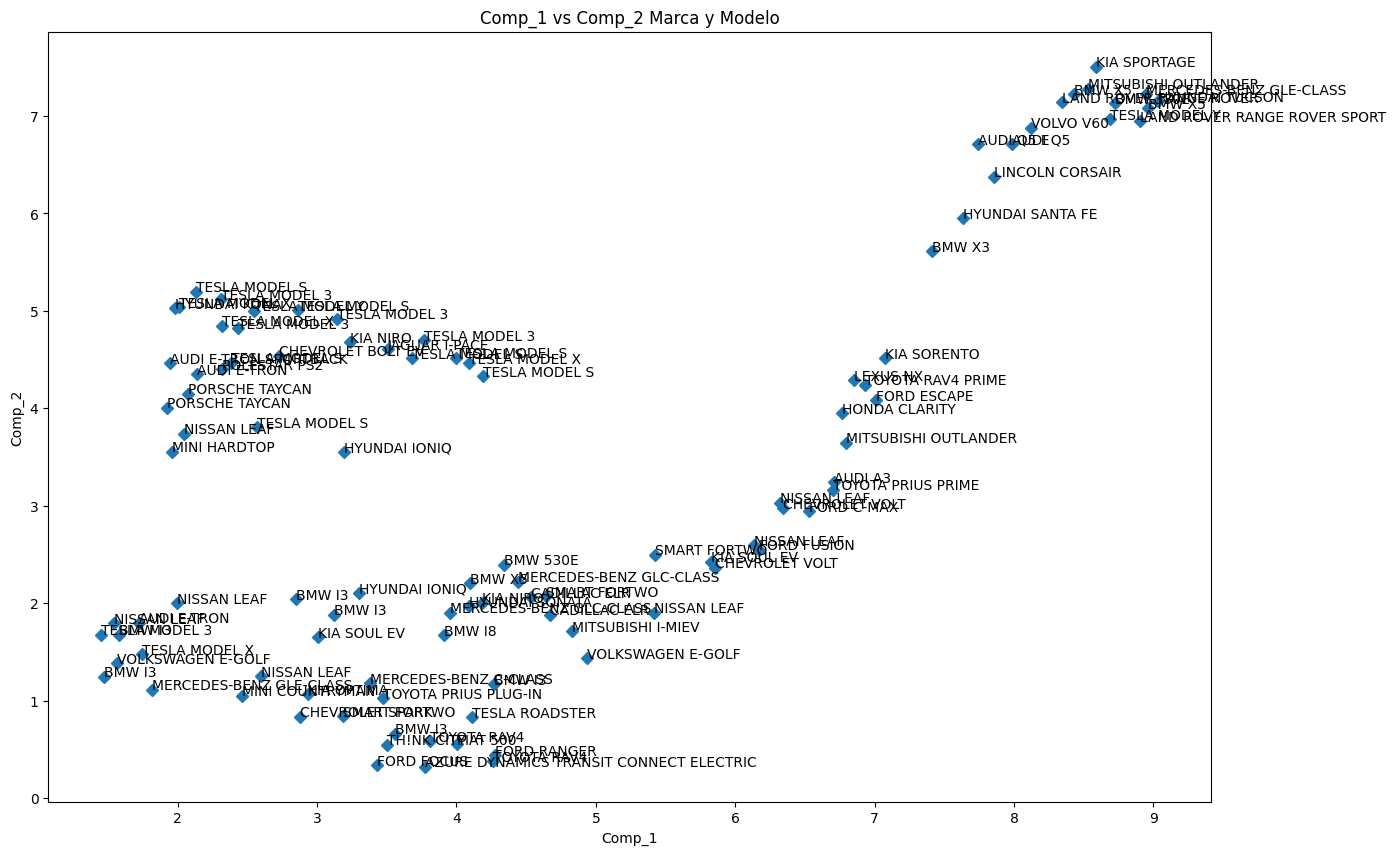

In [14]:
from matplotlib import pyplot as plt
plt.figure(figsize=(15,10))

ax = final.set_index('Comp_1')['Comp_2'].plot(style='D')
def label_point(x, y, val, ax):
  a = pd.concat({'x': x, 'y': y, 'Make_Model': val}, axis=1)
  for i, point in a.iterrows():
    ax.text(point['x'], point['y'], str(point['Make_Model']))

label_point(final.Comp_1, final.Comp_2, final.Make_Model, ax)
plt.title('Comp_1 vs Comp_2 Marca y Modelo')
plt.xlabel('Comp_1',color='Black')
plt.ylabel('Comp_2',color='black')

**Conclusiones.**

Se observan los vehículos con mayor autonomía de millas por carga de batería, en la parte central izquierda de la gráfica, entre los cuales se encuentra el Tesla Modelo S, Tesla Modelo 3, Porshe Taycan, etc.

Además, se observan los vehículos con menor autonomía por carga de batería, en la parte superior derecha de la gráfica, entre los cuales se encuentra el Mercedes-Benz GLE-CLASS, Tesla Modelo Y, BMW X3, etc.